# Price Optimisation based on price elasticity of Demand

Pricing a product is a crucial aspect in any business. A lot of thought process is out into it. There are different strategies to price different kinds of products. There are products whose sales are quite sensitive to their prices and as such a small change in their price can lead to noticeable change in their sales. While there are products whose sales are not much affected by their price - these tend to be either luxury items or necessities (like certain medicines). This notebook will focus on the former type of products.

Price elasticity of demand (Epd), or elasticity, is the degree to which the effective desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customer's desire could drop sharply even with a little price increase, and for other products, it could stay almost the same even with a big price increase. Economists use the term elasticity to denote this sensitivity to price increases. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.

Mathematically speaking, the price elasticity of demand is defined to be the percentage change in quantity demanded, q,divided by the percentage change in price, p. The formula for the price elasticity (ǫ) is: $$e = \%ΔQ/ \%ΔP$$


In this work, we shall look at the sales of the items of a cafe. This cafe sells burgers, coke, lemonade and coffee. As a data scientist, it is our task to figure out the optimal prices to set for these items. If the price is set too high, the sales will drop & the price is set to low, then the margins will decrease. What is the sweet spot that will give us the maximum profit?

In [ ]:
# install the required packages
!pip install pandas==1.1.5
!pip install numpy==1.19.5
!pip install statsmodels==0.10.2
!pip install  matplotlib==3.2.2
!pip install seaborn==0.11.1

In [24]:
# Import the reqiured libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [25]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [26]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the data

In [28]:
# load the datasets
sold = pd.read_csv('/content/Cafe+-+Sell+Meta+Data.csv')
transactions = pd.read_csv('/content/Cafe+-+Transaction+-+Store.csv')
date_info = pd.read_csv('/content/Cafe+-+DateInfo.csv')

In [ ]:
# check for first 5 rows
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [ ]:
# describe
sold.describe()
sold.describe(include = ['O'])

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [ ]:
# check for null
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

ITEM_ID: a categorical variable, identifier of the item that is contained in the product.

ITEM_NAME: a categorical variable, identifying the name of the item

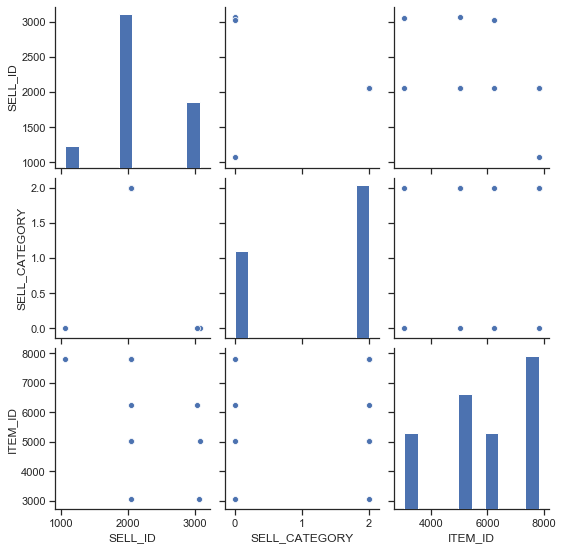

In [ ]:
# plot a pairplot for the data
sns.pairplot(sold)

In [ ]:
# check for first 5 rows
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [ ]:
# describe
transactions.describe()
transactions.describe(include = ['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [ ]:
# check for nulls
transactions[transactions.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


Important: It’s supposed the PRICE for that product in that day will not vary.

In details:
CALENDAR_DATE: a date/time variable, having the time always set to 00:00 AM.

PRICE: a numeric variable, associated with the price of the product identified by the SELL_ID.

QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID.

SELL_ID: a categorical variable, identifier of the product sold.

SELL_CATEGORY: a categorical variable, category of the product sold.

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

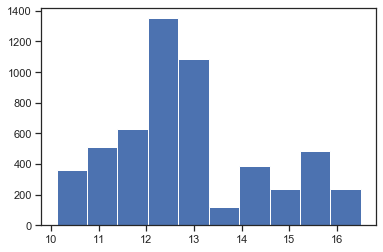

In [ ]:
# plot histogram to check data distribution
plt.hist(transactions.PRICE)

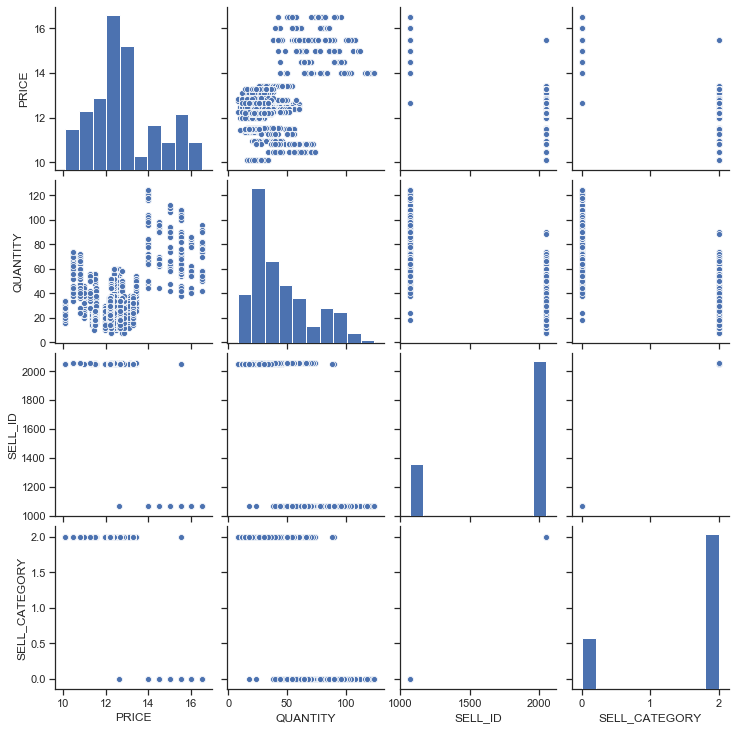

In [ ]:
# plot a pairplot for the data
sns.pairplot(transactions)

In [ ]:
# check for first 5 rows
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [ ]:
# describe
date_info.describe()
date_info.describe(include = ['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [ ]:
# check datatypes
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [49]:
# check for null
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
8,1/9/12,2012,NaN,0,0,23.0,0
9,1/10/12,2012,NaN,0,0,24.8,0
10,1/11/12,2012,NaN,0,0,21.2,0
11,1/12/12,2012,NaN,0,0,24.8,0
12,1/13/12,2012,NaN,0,0,26.6,0


In [50]:
# null value imputation
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [51]:
date_info

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0
5,1/6/12,2012,No Holiday,0,0,23.0,0
6,1/7/12,2012,No Holiday,1,0,26.6,0
7,1/8/12,2012,No Holiday,1,0,26.6,0
8,1/9/12,2012,No Holiday,0,0,23.0,0
9,1/10/12,2012,No Holiday,0,0,24.8,0


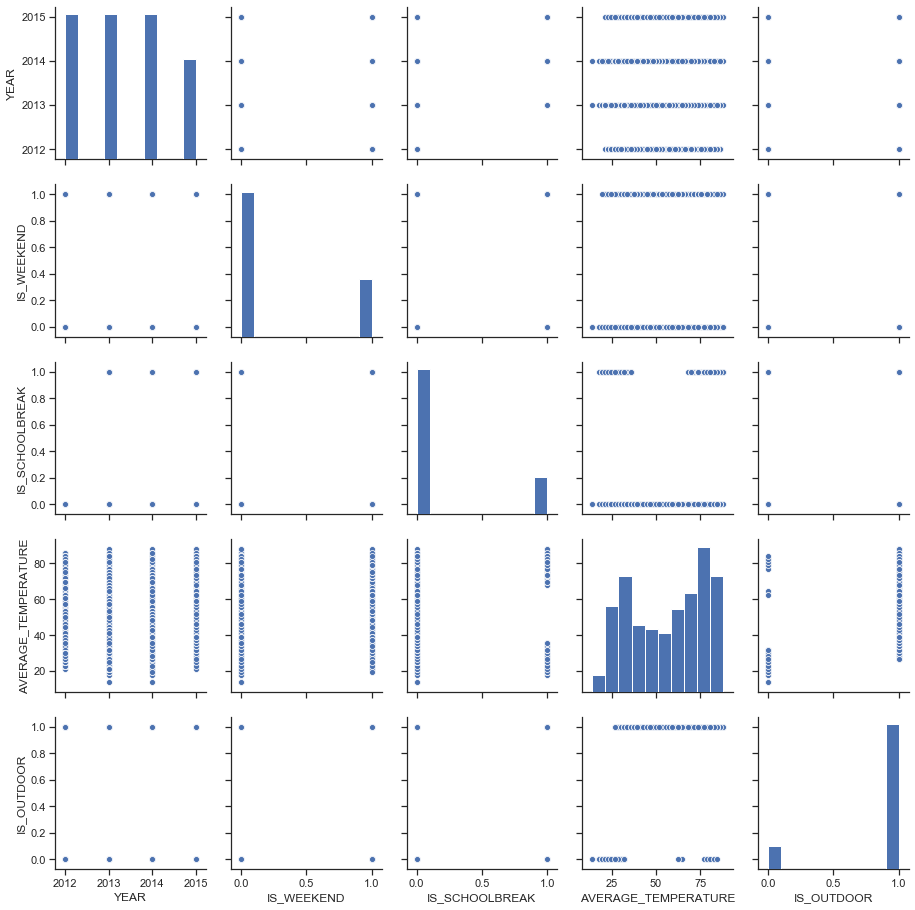

In [ ]:
# pairplot
sns.pairplot(date_info)

# Understanding the data better

In [52]:
# check for unique values
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [53]:
# minimum date
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [ ]:
# maximum date
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [54]:
# shape of data
date_info.shape

(1349, 7)

In [55]:
# check for null
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [ ]:
# ------------------------------------------------------------------------------------------------------

In [56]:
# concatenate the data
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [57]:

pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [58]:
# merge the data
data1 = pd.merge(sold.drop(['ITEM_ID','ITEM_NAME'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(20)
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,01/01/12,15.5,46
1,1070,0,01/02/12,15.5,70
2,1070,0,01/03/12,15.5,62
3,1070,0,01/04/12,15.5,88
4,1070,0,01/05/12,15.5,104
5,1070,0,01/06/12,15.5,100
6,1070,0,01/07/12,15.5,70
7,1070,0,01/08/12,15.5,70
8,1070,0,01/09/12,15.5,106
9,1070,0,01/10/12,15.5,108


In [59]:
b

SELL_ID  SELL_CATEGORY  CALENDAR_DATE  PRICE
1070     0              01/01/12       15.50     46
                        01/01/13       15.50     60
                        01/01/14       15.50     72
                        01/01/15       14.00     66
                        01/02/12       15.50     70
                        01/02/13       15.50     68
                        01/02/14       15.50     76
                        01/02/15       14.00    102
                        01/03/12       15.50     62
                        01/03/13       15.50     70
                        01/03/14       15.50     68
                        01/03/15       14.00     68
                        01/04/12       15.50     88
                        01/04/13       15.50    100
                        01/04/14       15.50     74
                        01/04/15       14.00     70
                        01/05/12       15.50    104
                        01/05/13       15.50     68
                   

In [60]:
data1.shape # check the shape
intermediate_data = b.reset_index()

(10808, 5)

In [ ]:
data1.shape # check the shape

(10808, 6)

In [ ]:
b.shape # check the shape

(10792,)

In [ ]:
# first 5 rows
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [61]:
# check the minimum date
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [62]:
# check the maximum date
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [63]:
# merge the data
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,1/13/12,12.73,80,2012,No Holiday,0,0,26.6,0
2,2052,2,1/13/12,12.75,52,2012,No Holiday,0,0,26.6,0
3,2053,2,1/13/12,12.60,174,2012,No Holiday,0,0,26.6,0
4,1070,0,1/13/13,15.50,70,2013,No Holiday,1,0,30.2,0


In [64]:
# check for the shape
combined_data.shape

(3348, 11)

In [65]:
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [ ]:
np.unique(combined_data['HOLIDAY'])
np.unique(combined_data['IS_WEEKEND'])
np.unique(combined_data['IS_SCHOOLBREAK'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1])

array([0, 1])

In [66]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]

In [67]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,1/13/12,12.73,80,2012,No Holiday,0,0,26.6,0
2,2052,2,1/13/12,12.75,52,2012,No Holiday,0,0,26.6,0
3,2053,2,1/13/12,12.60,174,2012,No Holiday,0,0,26.6,0
8,1070,0,1/13/14,15.50,104,2014,No Holiday,0,0,28.4,0


In [68]:
bau_data.shape

(1884, 11)

In [ ]:
# check for unique
np.unique(bau_data['HOLIDAY'])
np.unique(bau_data['IS_WEEKEND'])
np.unique(bau_data['IS_SCHOOLBREAK'])

array(['No Holiday'], dtype=object)

array([0])

array([0])

In [ ]:
bau_data[bau_data['IS_WEEKEND']==1]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [ ]:
bau_data[bau_data['HOLIDAY']!='No Holiday']

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


(array([ 471.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1413.]),
 array([1070. , 1168.3, 1266.6, 1364.9, 1463.2, 1561.5, 1659.8, 1758.1,
        1856.4, 1954.7, 2053. ]),
 <BarContainer object of 10 artists>)

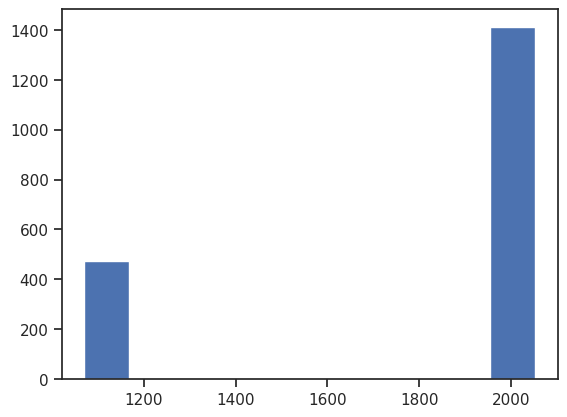

In [72]:
# Data exploration
plt.hist(bau_data['SELL_ID'])

(array([154., 174., 205., 472., 372.,  36., 122., 111., 174.,  64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

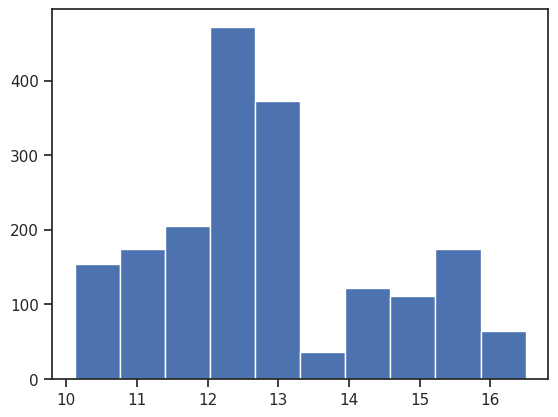

In [73]:
# histogram plot
plt.hist(bau_data.PRICE)

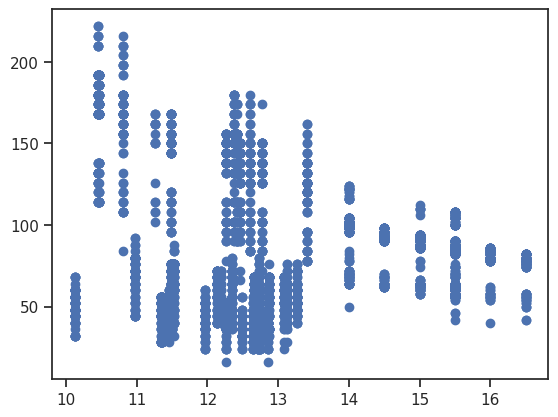

In [74]:
# scatter plot
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

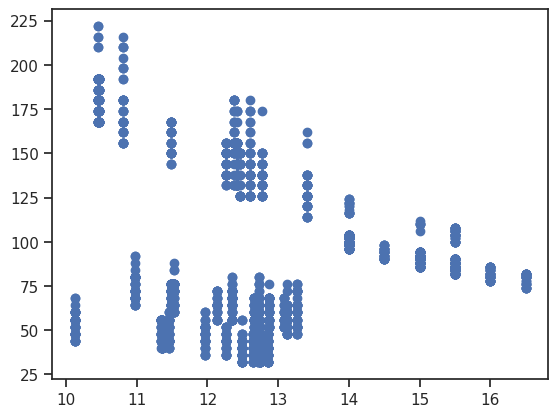

In [75]:
# scatter plot
plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])

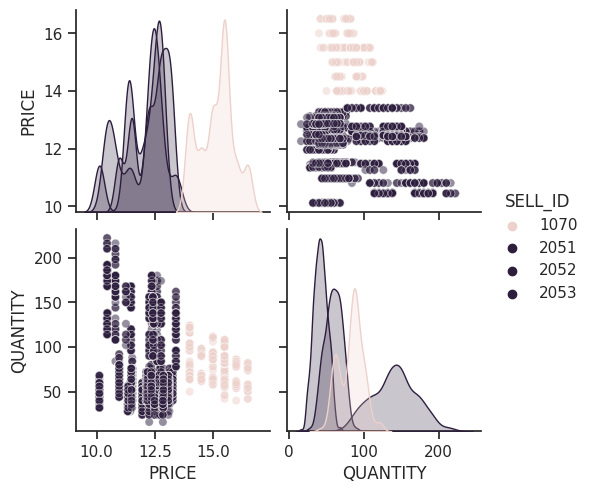

In [77]:
sns.pairplot(combined_data[['PRICE','QUANTITY','SELL_ID']], hue = 'SELL_ID', plot_kws={'alpha':0.5})

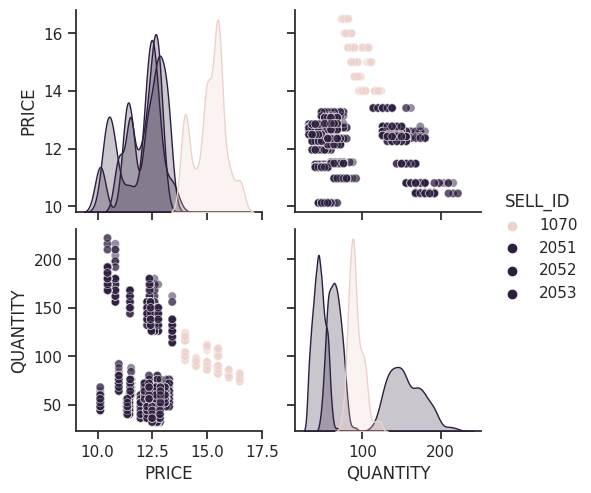

In [78]:
sns.pairplot(bau_data[['PRICE','QUANTITY','SELL_ID']], hue = 'SELL_ID', plot_kws={'alpha':0.5})

The price density plot is bimodal. From the graph we can see that for all quantities, as the price is increased the quantity sold is decreased.

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
4,1070,0,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
8,1070,0,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
12,1070,0,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
16,1070,0,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


(837, 11)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

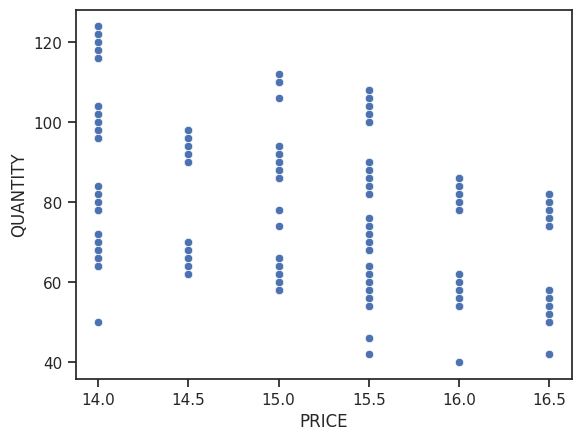

In [79]:
single_1070 = combined_data[combined_data['SELL_ID'] == 1070]
single_1070.head()
single_1070.shape
single_1070.describe()
sns.scatterplot(x = single_1070.PRICE, y = single_1070.QUANTITY )

# Modeling

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.45e-32
Time:                        04:58:00   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

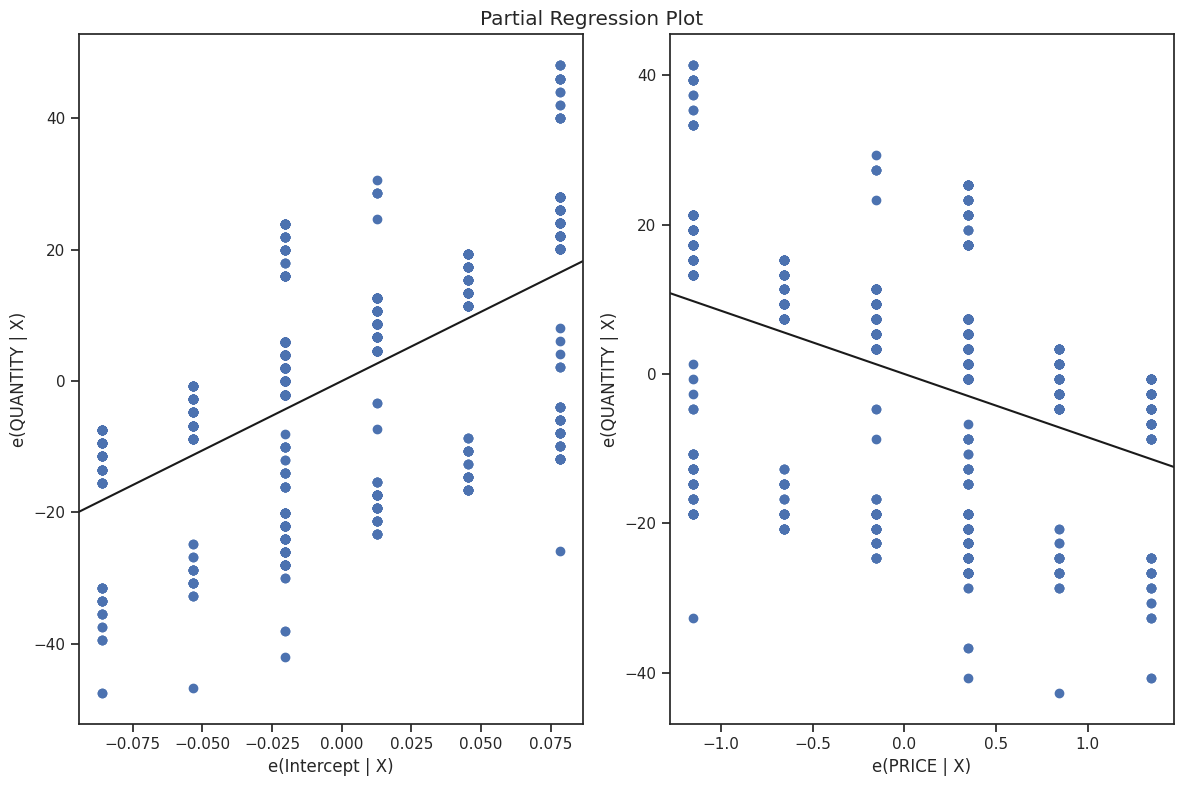

In [80]:
# This is for the combined data
model_1070 = ols("QUANTITY ~ PRICE", data=single_1070).fit()
print(model_1070.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model_1070, fig=fig)

Let's look at the bau data again to see if there is anything els ein the data we can use to further refine our model.

In [ ]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [81]:
bau2_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_OUTDOOR']==1)]

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
24,1070,0,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
44,1070,0,1/15/15,14.0,104,2015,No Holiday,0,0,32.0,1
60,1070,0,1/16/15,14.0,100,2015,No Holiday,0,0,32.0,1
224,1070,0,1/27/12,15.5,86,2012,No Holiday,0,0,32.0,1
288,1070,0,1/31/12,15.5,84,2012,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,416.0,416.0,416.000000,416.000000,416.000000,416.0,416.0,416.000000,416.0
mean,1070.0,0.0,15.139423,89.274038,2013.201923,0.0,0.0,57.282212,1.0
std,0.0,0.0,0.709511,6.811889,1.076628,0.0,0.0,16.890613,0.0
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,26.600000,1.0
25%,1070.0,0.0,14.500000,84.000000,2012.000000,0.0,0.0,41.000000,1.0
50%,1070.0,0.0,15.000000,88.000000,2013.000000,0.0,0.0,59.000000,1.0
75%,1070.0,0.0,15.500000,94.000000,2014.000000,0.0,0.0,71.600000,1.0
max,1070.0,0.0,16.500000,104.000000,2015.000000,0.0,0.0,87.800000,1.0


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

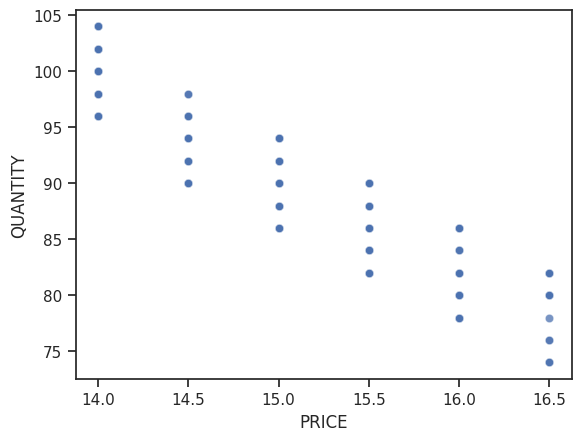

In [82]:
single_1070 = bau2_data[bau2_data['SELL_ID'] == 1070]

single_1070.head()
single_1070.describe()
sns.scatterplot(data = single_1070, x = single_1070.PRICE, y = single_1070.QUANTITY, alpha = 0.5)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          5.51e-153
Time:                        05:01:21   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 1200x800 with 0 Axes>

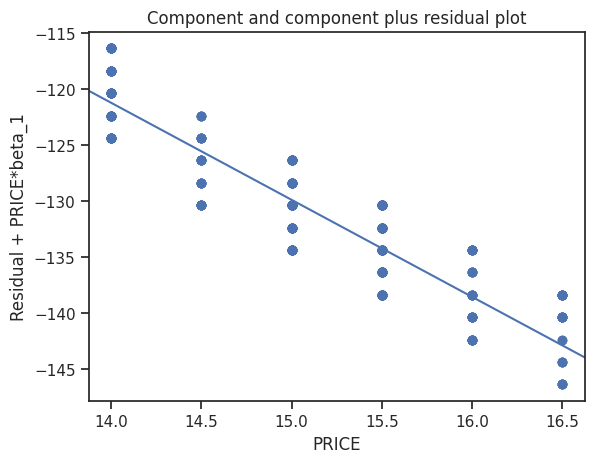

In [83]:
model_1070 = ols("QUANTITY ~ PRICE", data=single_1070).fit()
print(model_1070.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(model_1070, "PRICE")

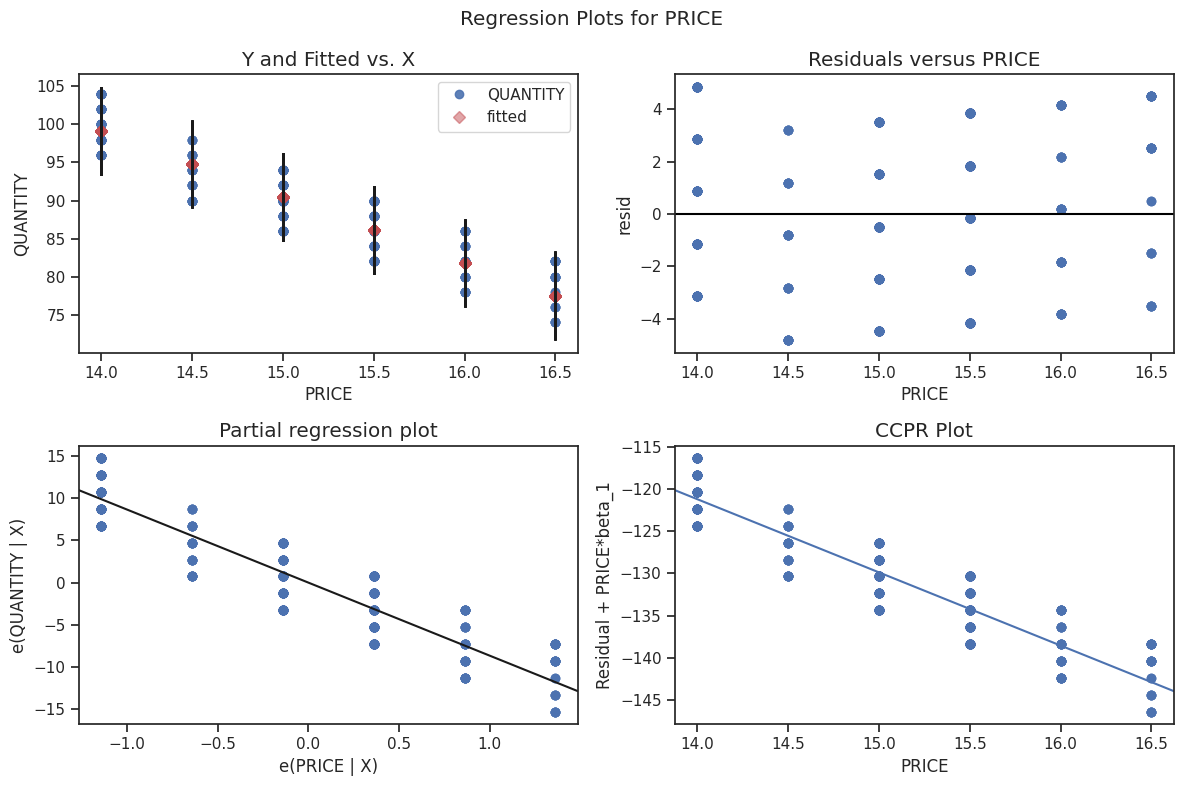

In [84]:
# plot
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_1070, "PRICE", fig=fig)

In [87]:
elasticities = {}

In [86]:
# function to create a model and finding elasticity
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit() # fit the model
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary()) # check for summary
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig) # plot
    return price_elasticity, model

Price elasticity of the product: -8.658581488470567
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          5.51e-153
Time:                        05:07:25   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


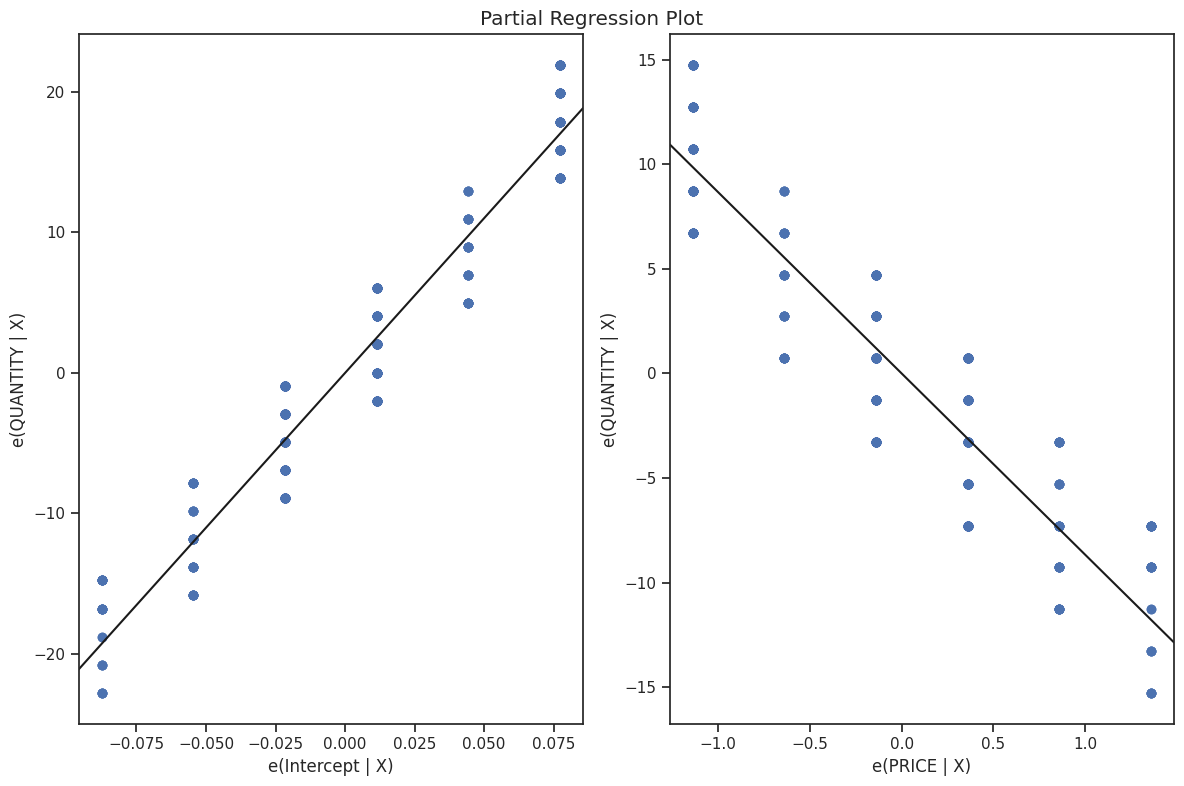

In [88]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(single_1070)
elasticities['single_1070'] = price_elasticity

Price elasticity of the product: -7.237981230912618
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.34e-58
Time:                        05:08:33   Log-Likelihood:                -1309.8
No. Observations:                 416   AIC:                             2624.
Df Residuals:                     414   BIC:                             2632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


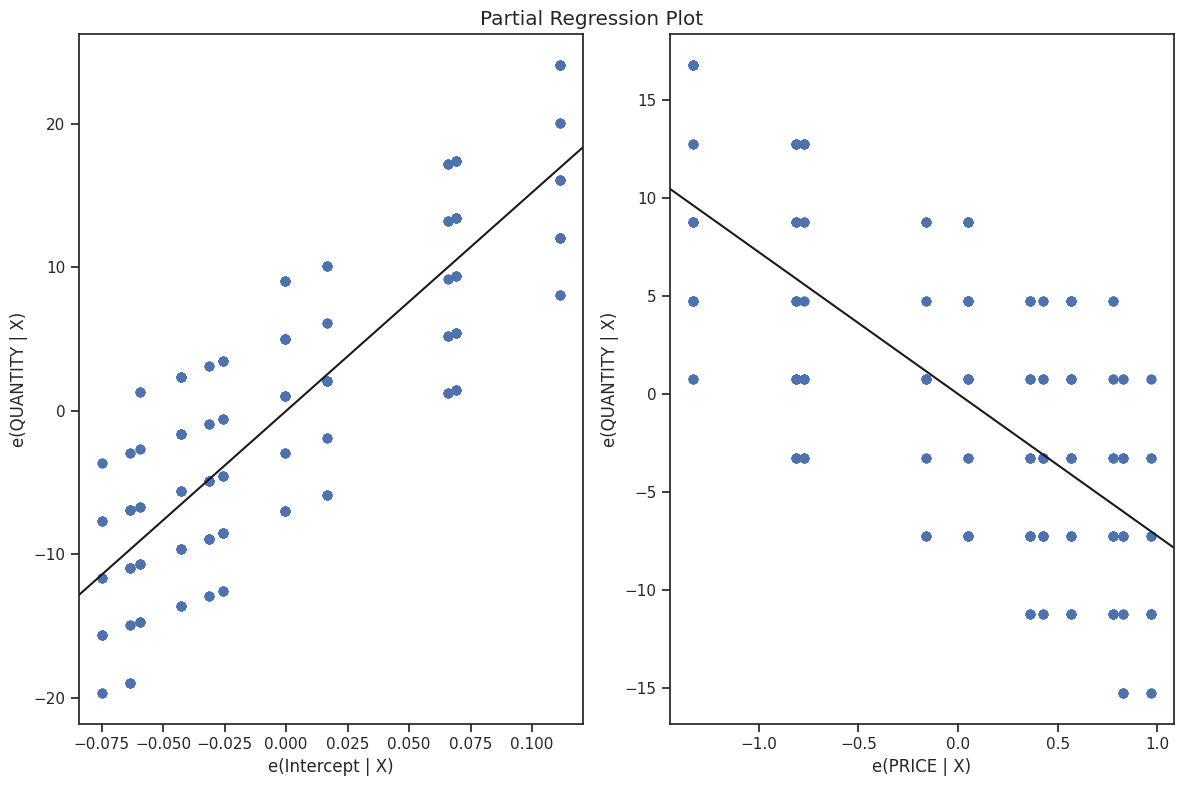

In [89]:
combo_2051 = bau2_data[bau2_data['SELL_ID'] == 2051]
elasticities['combo_2051'], model_2051 = create_model_and_find_elasticity(combo_2051)

Price elasticity of the product: -5.713405969119921
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           5.32e-53
Time:                        05:09:22   Log-Likelihood:                -1303.0
No. Observations:                 416   AIC:                             2610.
Df Residuals:                     414   BIC:                             2618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


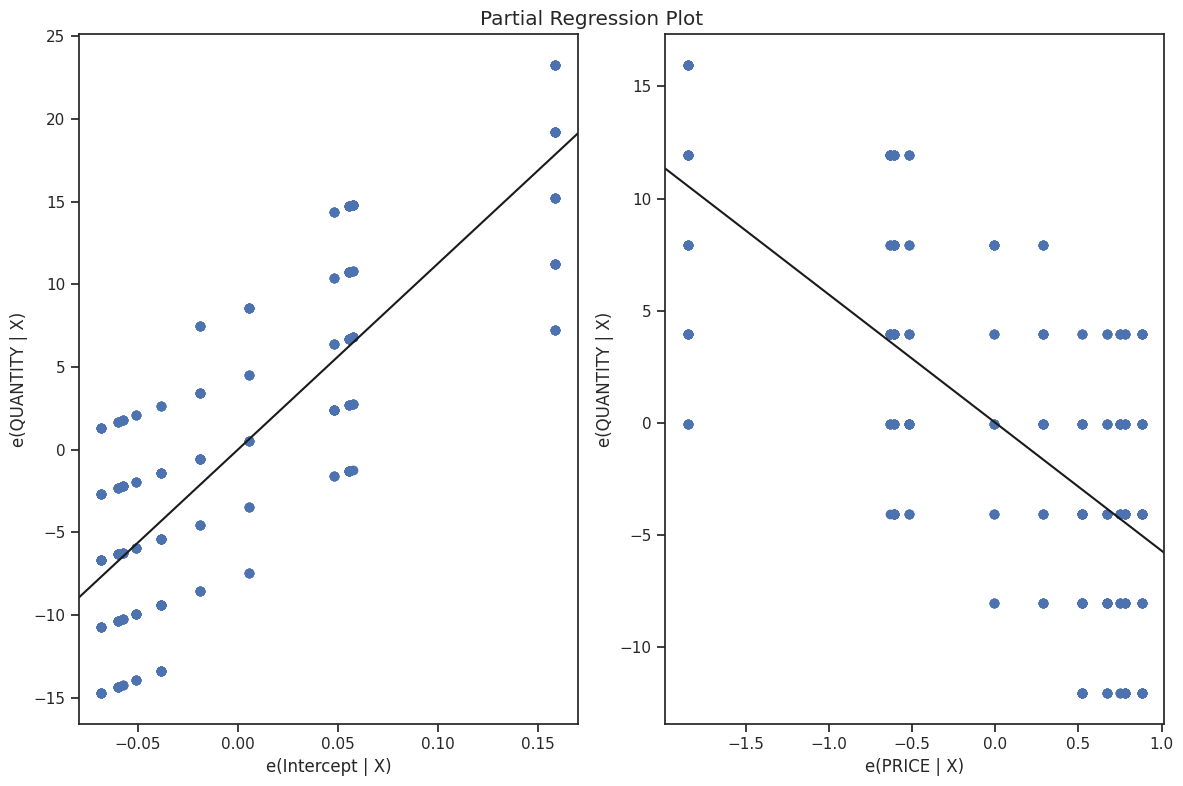

In [90]:
combo_2052 = bau2_data[bau2_data['SELL_ID'] == 2052]
elasticities['combo_2052'], model_2052 = create_model_and_find_elasticity(combo_2052)

Price elasticity of the product: -18.492469998690474
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          3.72e-152
Time:                        05:09:52   Log-Likelihood:                -1492.7
No. Observations:                 416   AIC:                             2989.
Df Residuals:                     414   BIC:                             2997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

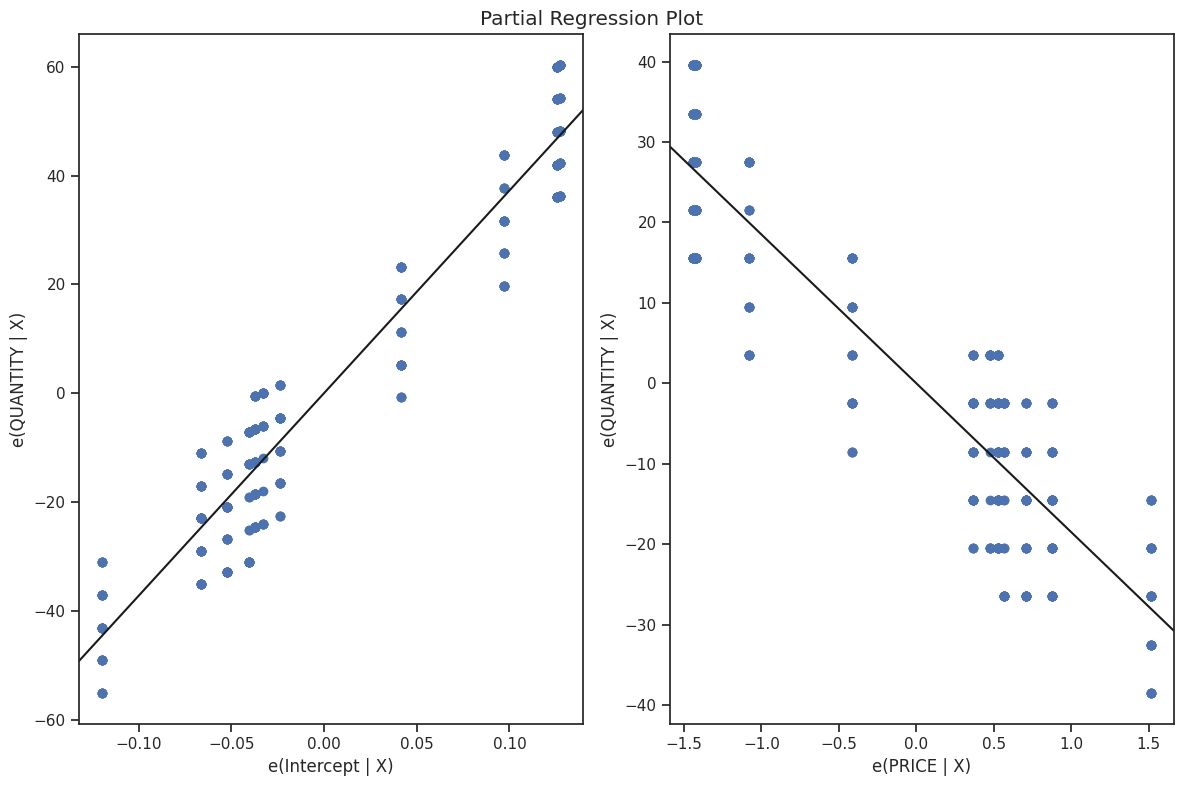

In [91]:
combo_2053 = bau2_data[bau2_data['SELL_ID'] == 2053]
elasticities['combo_2053'], model_2053 = create_model_and_find_elasticity(combo_2053)

## List in a table the items and their price elasticities

In [92]:
# check the elastcities
elasticities

{'single_1070': -8.658581488470567,
 'combo_2051': -7.237981230912618,
 'combo_2052': -5.713405969119921,
 'combo_2053': -18.492469998690474}

# Find optimal price for maximum profit

Now, let's take burger, SELL_ID=1070, as an example. Since we do not know the buying price, let''s assume it to be a little less than the minimum price in the dataset.

In [93]:
s_burger_data = single_1070

In [95]:
single_1070.head()

,SELL_ID,SELL_CATEGORY,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
24,1070,0,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
44,1070,0,1/15/15,14.0,104,2015,No Holiday,0,0,32.0,1
60,1070,0,1/16/15,14.0,100,2015,No Holiday,0,0,32.0,1
224,1070,0,1/27/12,15.5,86,2012,No Holiday,0,0,32.0,1
288,1070,0,1/31/12,15.5,84,2012,No Holiday,0,0,32.0,1


In [96]:
# minimum value
s_burger_data.PRICE.min()

14.0

In [97]:
# maximum value
s_burger_data.PRICE.max()

16.5

Let's take 10 as the buying price of burger. We now want to be able to set the price of burger to get the maximum profit. PRICE is the selling price

In [98]:
buying_price_1070 = 10

$$1070 data.PROFIT = (1070 data.PRICE - buying price 1070) * 1070 data.QUANTITY$$
Let's see the profit for various price points:

In [99]:
start_price = 10.5
end_price = 20

In [100]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [101]:
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [102]:
test['QUANTITY'] = model_1070.predict(test['PRICE'])

In [103]:
test

,PRICE,QUANTITY
0,10.50,129.444861
1,10.51,129.358275
2,10.52,129.271690
3,10.53,129.185104
4,10.54,129.098518
5,10.55,129.011932
6,10.56,128.925346
7,10.57,128.838761
8,10.58,128.752175
9,10.59,128.665589


In [104]:
test['PROFIT'] = (test["PRICE"] - buying_price_1070) * test["QUANTITY"]

In [105]:
test

,PRICE,QUANTITY,PROFIT
0,10.50,129.444861,64.722431
1,10.51,129.358275,65.972720
2,10.52,129.271690,67.221279
3,10.53,129.185104,68.468105
4,10.54,129.098518,69.713200
5,10.55,129.011932,70.956563
6,10.56,128.925346,72.198194
7,10.57,128.838761,73.438094
8,10.58,128.752175,74.676261
9,10.59,128.665589,75.912697


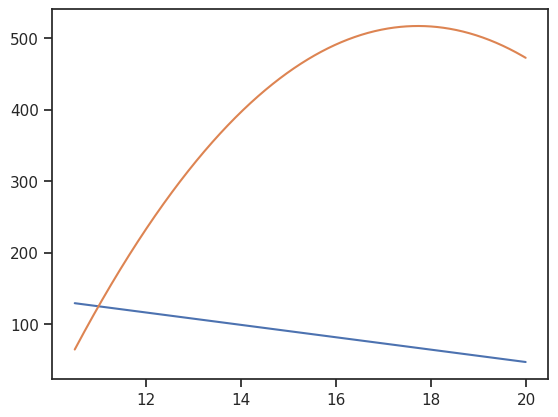

In [106]:
# plot the test
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

Let's find the exact price at which maximum profit is gained:

In [107]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [108]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
722,17.72,66.929903,516.69885


In [109]:
# define a function for finding the optimal price
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 4              # start price
    end_price = data.PRICE.min() + 10               # end price
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])  # choose required columns
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])         # make predictions
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit


## Calculate the optimal price for all and list in table

In [110]:
optimal_price = {}
buying_price = 10

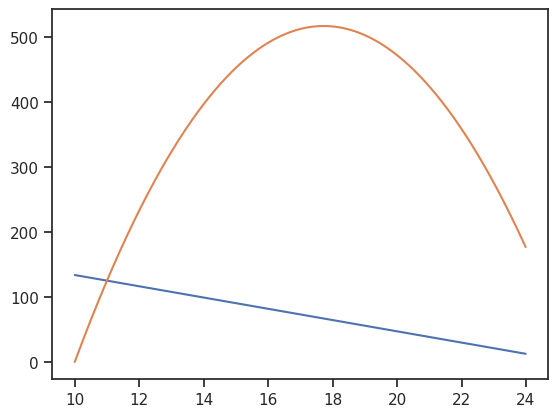

In [111]:
optimal_price['single_1070'] = find_optimal_price(single_1070, model_1070, buying_price)

In [112]:
optimal_price

{'single_1070':      PRICE   QUANTITY     PROFIT
 772  17.72  66.929903  516.69885}

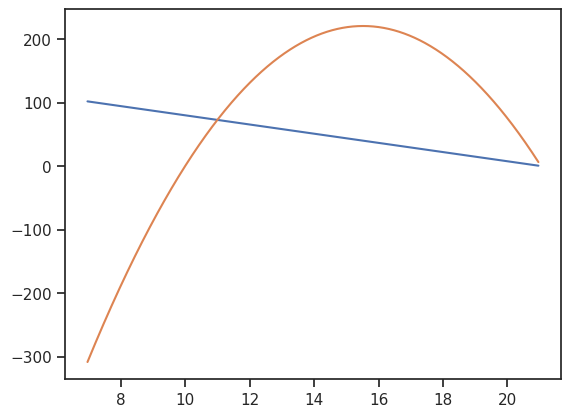

In [113]:
optimal_price['combo_2051'] = find_optimal_price(combo_2051, model_2051, buying_price)

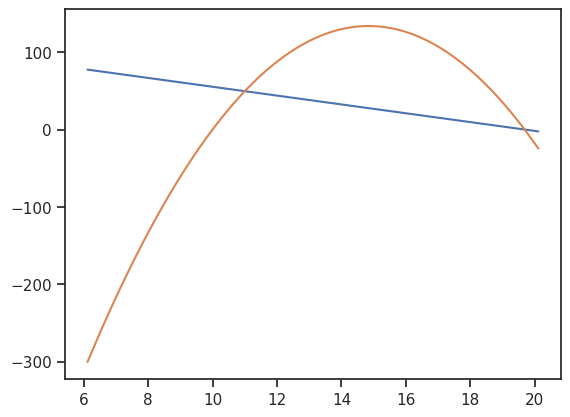

In [114]:
optimal_price['combo_2052'] = find_optimal_price(combo_2052, model_2052, buying_price)

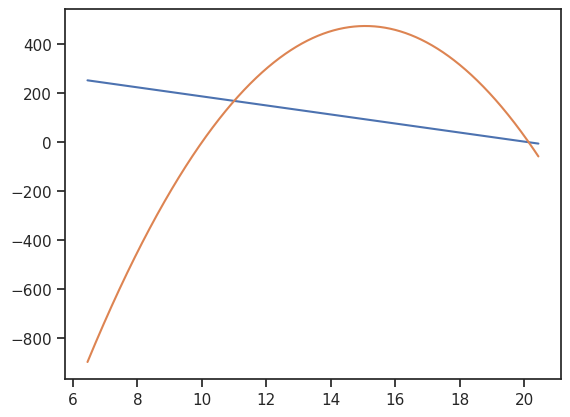

In [115]:
optimal_price['combo_2053'] = find_optimal_price(combo_2053, model_2053, buying_price)

In [116]:
optimal_price

{'single_1070':      PRICE   QUANTITY     PROFIT
 772  17.72  66.929903  516.69885,
 'combo_2051':      PRICE   QUANTITY      PROFIT
 855  15.52  39.945394  220.498577,
 'combo_2052':      PRICE   QUANTITY      PROFIT
 872  14.84  27.661728  133.882763,
 'combo_2053':      PRICE   QUANTITY      PROFIT
 862  15.07  93.743617  475.280138}

# Conclusion

This is the price the cafe should set on it's item to earn maximum profit based on it's previous sales data. It is important to note that this is on a normal day. On 'other' days such as a holiday, or an event taking place have a different impact on customer buying behaviours and pattern. Usually an increase in consumption is seen on such days. These must be treated separately. Similarly, it is important to remove any external effects other than price that will affect the purchase behaviours of customers including the datapoints when the item was on discount.

Once the new prices are put up, it is important to continuously monitor the sales and profit. If this method of pricing is a part of a poduct, a dashboard can be created for the purpose of monitoring these items and calculating the lift in the profit.